In [271]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

In [479]:
path = 'forest_fire/data/new_data/'
list_of_files = os.listdir(path)
list_of_files   

['statistics_biggestnfighters100ext_strength10.csv',
 'statistics_biggestnfighters100ext_strength2.csv',
 'statistics_biggestnfighters100ext_strength4.csv',
 'statistics_biggestnfighters100ext_strength6.csv',
 'statistics_biggestnfighters100ext_strength8.csv',
 'statistics_biggestnfighters300ext_strength10.csv',
 'statistics_biggestnfighters300ext_strength4.csv',
 'statistics_biggestnfighters500ext_strength10.csv',
 'statistics_biggestnfighters500ext_strength4.csv',
 'statistics_biggestnfighters700ext_strength10.csv',
 'statistics_biggestnfighters700ext_strength4.csv',
 'statistics_biggestnfighters900ext_strength10.csv',
 'statistics_biggestnfighters900ext_strength4.csv',
 'statistics_closestnfighters100ext_strength10.csv',
 'statistics_closestnfighters100ext_strength2.csv',
 'statistics_closestnfighters100ext_strength4.csv',
 'statistics_closestnfighters100ext_strength6.csv',
 'statistics_closestnfighters100ext_strength8.csv',
 'statistics_closestnfighters300ext_strength10.csv',
 'sta

In [480]:
# The different comparisons are 
# - 100 vs 300 firefighters at strength 10
# - 100 firefighters, on multiple strengths 
# - different tactics

# for obvious reasons we only will compare the tactics on
#  300 strength. 
data = pd.DataFrame()
for file in list_of_files:
    inputdf = pd.read_csv(path + '/' + file)
    inputdf.drop(['Unnamed: 0'], axis=1, inplace=True)
    
    if inputdf.empty == False:
        peaks, durations, numbers = get_outbreaks(inputdf['On fire'], threshold=750)

        df = pd.DataFrame(data={'FireSize': peaks,
                                'Duration': durations,
                                'Number': numbers})
        strats = ['biggest', 'closest', 'earliest', 'random', 'none']
        n_fighters = ['nfighters100', 'nfighters300', 'nfighters500', 'nfighters700', 'nfighters900']
        strengths = ['strength2', 'strength4', 'strength6', 'strength8', 'strength10']
        
        if 'nfighters0' in file:
            df['Strategy'] = 'No firefighters'
            df['N_firefighters'] = '0'
            df['Strength'] = '0'
        else:
            
            for strat in strats:
                for fighter in n_fighters:
                    for strength in strengths:
                        if strat in file and fighter in file and strength in file:
                            df['Strategy'] = strat
                            df['N_firefighters'] = fighter
                            df['Strength'] = strength

        data = data.append(df)
                    

In [481]:
data.loc[data['N_firefighters'].isnull()]

,FireSize,Duration,Number,Strategy,N_firefighters,Strength


In [351]:
def get_outbreaks(data, threshold=25):
    """
    Calculates the outbreaks from the actives data.

    Returns:
        - An array with the outbreak peak sizes.
        - An array with the outbreak durations.
        - An array of the outbreaks
    """
    outbreak_peaks = []
    outbreak_widths = []
    counting = False
    current_peak = 0
    start = 0

    for i in range(len(data)):

        if data[i] >= threshold and not counting:
            counting = True
            if current_peak < data[i]:
                current_peak = data[i]
            start = i

        elif data[i] >= threshold and counting:
            if current_peak < data[i]:
                current_peak = data[i]

        elif data[i] < threshold and counting:
            outbreak_peaks.append(current_peak)
            outbreak_widths.append(i-start)
            current_peak = 0
            counting = False

    # Capture cases where timeline ends in an outbreak.
    # Obviously skewers data, but preferable over 0 or infinite outbreaks.
    if not outbreak_peaks and counting:
        outbreak_peaks.append(current_peak)
        outbreak_widths.append(len(data))
    elif not outbreak_peaks and not counting:
        outbreak_peaks.append(0)
        outbreak_widths.append(0)

    return outbreak_peaks, outbreak_widths, list(range(len(outbreak_peaks)))

In [482]:
data.dtypes

FireSize           int64
Duration           int64
Number             int64
Strategy          object
N_firefighters    object
Strength          object
dtype: object

In [356]:
data['FireSize'] = data['FireSize'].astype('int')
data['Duration'] = data['Duration'].astype('int')
data['Number'] = data['Number'].astype('int')
data['Strategy'] = data['Strategy'].astype('str')

In [484]:
data.loc[data['N_firefighters'] == 'nfighters300']

,FireSize,Duration,Number,Strategy,N_firefighters,Strength
0,5229,104,0,biggest,nfighters300,strength10
1,2499,109,1,biggest,nfighters300,strength10
2,2855,100,2,biggest,nfighters300,strength10
3,2632,99,3,biggest,nfighters300,strength10
4,2989,108,4,biggest,nfighters300,strength10
...,...,...,...,...,...,...
15,2384,98,15,random,nfighters300,strength4
16,2756,86,16,random,nfighters300,strength4
17,1944,107,17,random,nfighters300,strength4
18,1692,93,18,random,nfighters300,strength4


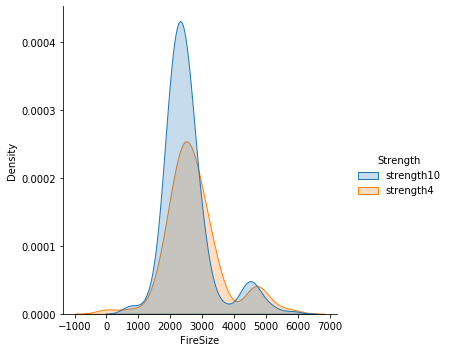

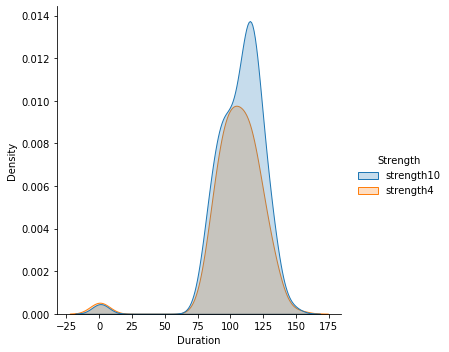

In [491]:
sns.displot(data.loc[data['N_firefighters'] == 'nfighters300'], x='FireSize', hue='Strength', fill=True, kind='kde')
plt.show()
sns.displot(data.loc[data['N_firefighters'] == 'nfighters300'], x='Duration', hue='Strength', fill=True, kind='kde')
plt.show()

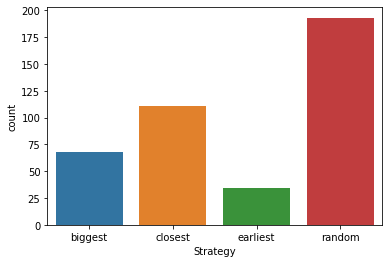

In [487]:
sns.countplot(data=data[data['N_firefighters'] == 'nfighters300'], x='Strategy')

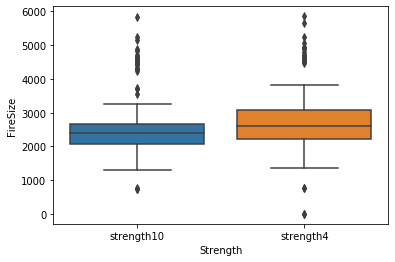

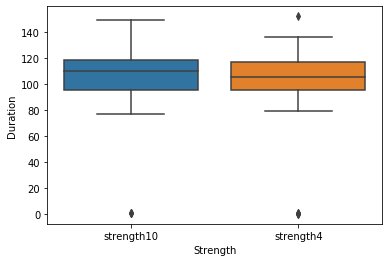

In [490]:
sns.boxplot(data=data.loc[data['N_firefighters'] == 'nfighters300'], x='Strength', y='FireSize')
plt.show()
sns.boxplot(data=data.loc[data['N_firefighters'] == 'nfighters300'], x='Strength', y='Duration')
plt.show()

biggest
closest
earliest
random


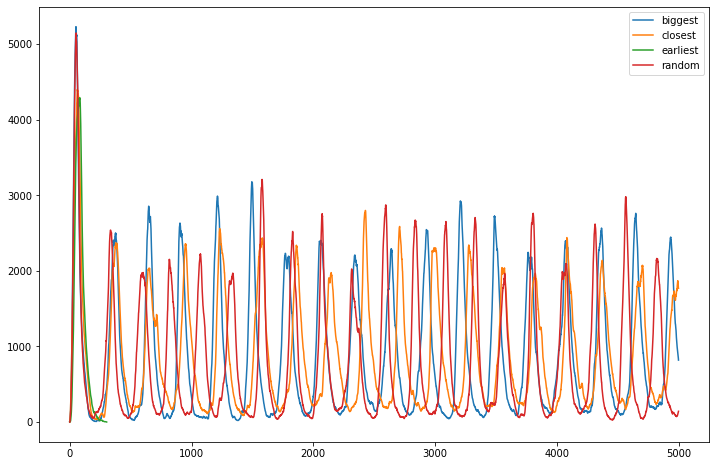

In [361]:
# plot first plot about the difference in the extinguish ways
plt.figure(figsize=(12, 8))
for strat in data.keys():
    print(strat)
    plt.plot(data[strat]['trees_on_fire'])
plt.legend(data.keys())
plt.show()


In [362]:
x = data['random']['max_fire_area'].value_counts()
x

9       275
8       267
7       255
10      157
6       140
       ... 
3156      1
1109      1
3188      1
3240      1
1903      1
Name: max_fire_area, Length: 595, dtype: int64

In [409]:
from scipy.stats import linregress
logx = np.log(x.values)
logy = np.log(x.index)

linregres_ = linregress(logx, logy).slope
linregres_

-0.8703012811898054

Text(0.5, 0, 'N times (slope=-0.87)')

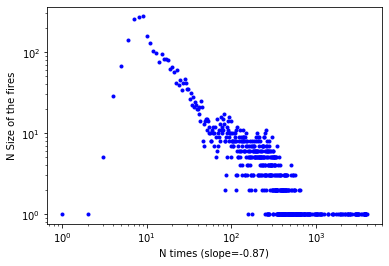

In [410]:
plt.loglog(x, 'or', marker='.', c='blue')
plt.ylabel('N Size of the fires')
plt.xlabel(f'N times (slope={round(linregres_, 3)})')

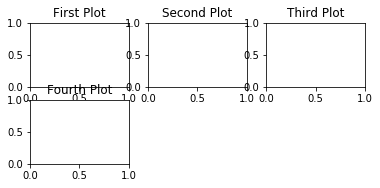

In [156]:
import numpy as np

xlog = np.log(x.index)
ylog = np.log(x.values)

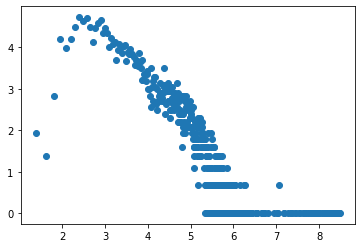

In [157]:
plt.scatter(xlog, ylog)

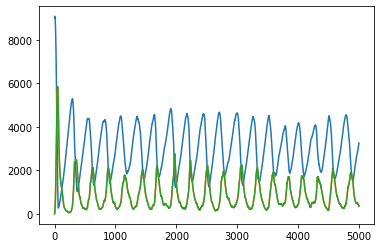

In [70]:
plt.plot(files[0][['Fine', 'On fire', 'trees_on_fire']])
plt.show()